# Digit recognition with CNN

In [2]:
# loading libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading dataset

In [3]:
# importing and loading the dataset
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

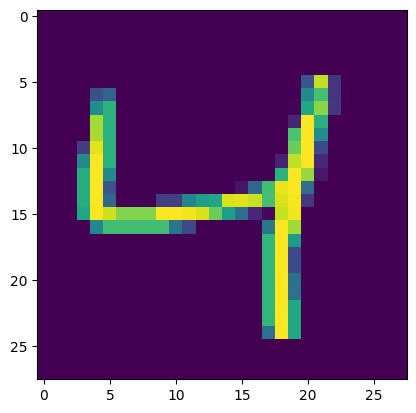

In [4]:
# exploring the dataset
plt.imshow(X_train[2])

In [5]:
# output for the above image
y_train[2]

4

In [6]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [8]:
# min max values in the dataset
X_train.min(), X_train.max()

(0, 255)

Pixel range form 0 to 255

In [9]:
y_train.min(), y_train.max()

(0, 9)

Output digits 0 - 9

### Data preprocessing

In [10]:
# normalize the images
X_train = X_train/255.0
X_test = X_test/255.0

In [11]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [12]:
# reshape the images
X_train.shape, X_train.shape

((60000, 28, 28), (60000, 28, 28))

We have to reshape the 2D images into 3 dimension for feeding to the CNN

In [34]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Building the model

In [14]:
# instantiating the cnn
model = tf.keras.models.Sequential()

In [16]:
# adding first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (28, 28, 1)))

# adding second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))

# adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))

# adding flatten layer
model.add(tf.keras.layers.Flatten())

# adding fully connected layer
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [17]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [18]:
# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

### Model Training

In [19]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 109s 229ms/step - loss: 0.1653 - sparse_categorical_accuracy: 0.9505 - val_loss: 0.0576 - val_sparse_categorical_accuracy: 0.9801
Epoch 2/10
469/469 [==============================] - 112s 239ms/step - loss: 0.0504 - sparse_categorical_accuracy: 0.9842 - val_loss: 0.0452 - val_sparse_categorical_accuracy: 0.9856
Epoch 3/10
469/469 [==============================] - 107s 229ms/step - loss: 0.0360 - sparse_categorical_accuracy: 0.9890 - val_loss: 0.0318 - val_sparse_categorical_accuracy: 0.9901
Epoch 4/10
469/469 [==============================] - 106s 226ms/step - loss: 0.0272 - sparse_categorical_accuracy: 0.9908 - val_loss: 0.0336 - val_sparse_categorical_accuracy: 0.9888
Epoch 5/10
469/469 [==============================] - 109s 231ms/step - loss: 0.0201 - sparse_categorical_accuracy: 0.9935 - val_loss: 0.0337 - val_sparse_categorical_accuracy: 0.9897
Epoch 6/10
469/469 [==============================] - 106s 225ms/step - loss: 0.

### Model evaluation

In [44]:
# predicting with test data
y_pred = model.predict(X_test)

313/313 [==============================] - 5s 15ms/step


In [45]:
# convert the predicted probabilities to integer labels
y_pred = np.argmax(y_pred, axis=1)

In [47]:
# comparing prediction with test value
y_pred[100], y_test[100]

(6, 6)

In [51]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 974,    0,    1,    0,    0,    0,    3,    0,    2,    0],
       [   0, 1131,    2,    0,    0,    0,    2,    1,    0,    1],
       [   0,    1, 1020,    0,    0,    0,    0,    5,    1,    0],
       [   0,    0,    0, 1003,    0,    5,    0,    0,    2,    1],
       [   1,    0,    2,    0,  980,    0,    2,    0,    1,    7],
       [   0,    0,    0,    4,    0,  886,    1,    0,    1,    3],
       [   2,    2,    1,    0,    0,    1,  948,    0,    1,    0],
       [   1,    1,    6,    2,    0,    0,    0, 1021,    1,    7],
       [   1,    0,    0,    1,    0,    0,    2,    1,  963,    1],
       [   1,    0,    0,    0,    2,    0,    0,    0,    2,  989]],
      dtype=int64)

In [55]:
# accuracy score
acc = accuracy_score(y_pred, y_test)
print(f'Accuracy score of CNN model is {acc * 100}%')

Accuracy score of CNN model is 99.15%


### Learning curve

In [62]:
def learning_curve(history, epoch):
    
    #training vs validation accuracy
    epoch_range = range(1, epoch+1)
    plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
    plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc= 'upper left')
    plt.show()
    
    # training vs validation loss
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'val'], loc='upper left')
    plt.show()

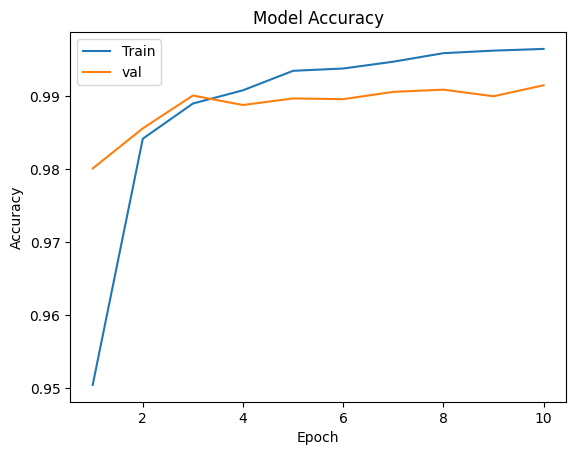

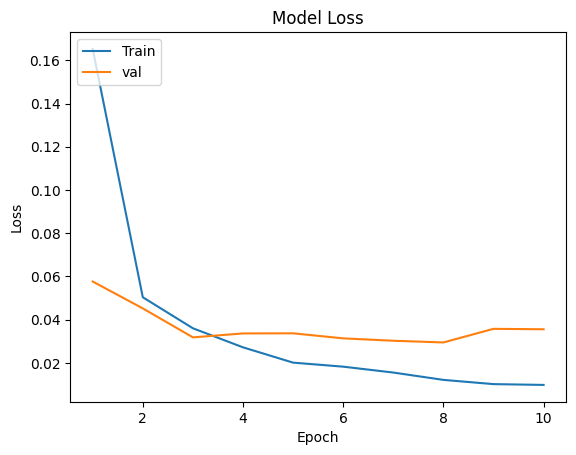

In [63]:
learning_curve(history, 10)

* We can see that training and validation accuracy is increasing with epoch
* Training loss is decreasing while validation loss remains same